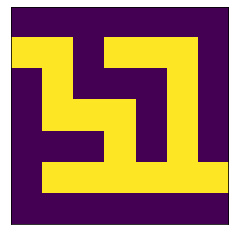

In [31]:
import random
import matplotlib.pyplot as plt

class Maillon:
    def __init__(self,valeur,suivant=None):
        self.valeur = valeur
        self.suivant = suivant
        
class Pile:
    def __init__(self):
        self.taille = 0
        self.sommet = None
        
    def empiler(self,valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1
        
    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet=self.sommet.suivant
            self.taille-=1
            return valeur
        
    def estVide(self):
        return self.taille==0
        
    def lireSommet(self):  
        return self.sommet.valeur
    
# Dimensions de la grille:
LARGEUR = 3
HAUTEUR = 3

def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille
    """
    
    listeVoisins =[]
    i,j = couple[0], couple[1]
    for d in (-1,1):
        if -1 < i+d < HAUTEUR: listeVoisins.append((i+d,j))
        if -1 < j+d < LARGEUR: listeVoisins.append((i,j+d))
    return listeVoisins

def dfs(s):
    P={s:None}
    Q=Pile()
    Q.empiler(s)
    while not(Q.estVide()):
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v = random.choice(R)
            P[v]=u
            Q.empiler(v)
        else:
            Q.depiler()
    return P

def dedale():
    """
    Fonction dessinant le résultat
    """
    labyrinthe = [[0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)]
    parcours= dfs((0,0))
    
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1]=1
        if (i,j) != (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 1
            labyrinthe[i+k+1][j+l+1] = 1
            
    labyrinthe[1][0] = 1
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 1
        
    plt.imshow(labyrinthe)
    plt.xticks([])
    plt.yticks([])
    plt.show()
        


dedale()
    

In [33]:
for x in range(0,3):
    for y in range(0,3):
        print(voisinage((x,y)))

[(1, 0), (0, 1)]
[(0, 0), (1, 1), (0, 2)]
[(0, 1), (1, 2)]
[(0, 0), (2, 0), (1, 1)]
[(0, 1), (1, 0), (2, 1), (1, 2)]
[(0, 2), (1, 1), (2, 2)]
[(1, 0), (2, 1)]
[(1, 1), (2, 0), (2, 2)]
[(1, 2), (2, 1)]


In [35]:
dfs((3,3))

{(3, 3): None,
 (2, 3): (3, 3),
 (2, 2): (2, 3),
 (1, 2): (2, 2),
 (1, 1): (1, 2),
 (2, 1): (1, 1),
 (2, 0): (2, 1),
 (1, 0): (2, 0),
 (0, 0): (1, 0),
 (0, 1): (0, 0),
 (0, 2): (0, 1),
 (1, 3): (2, 3),
 (0, 3): (1, 3),
 (3, 2): (3, 3),
 (3, 1): (3, 2),
 (3, 0): (3, 1)}

In [36]:
def affiche_peres(pere,depart,extremite,trajet):
    """
    À partir du dictionnaire des pères de chaque sommet on renvoie
    la liste des sommets du plus court chemin trouvé. Calcul récursif.
    On part de la fin et on remonte vers le départ du chemin.
    
    """
    if extremite == depart:
        return [depart] + trajet
    else:
        return (affiche_peres(pere, depart, pere[extremite], [extremite] + trajet))
 
def plus_court(graphe,etape,fin,visites,dist,pere,depart):
    """
    Trouve récursivement la plus courte chaine entre debut et fin avec l'algo de Dijkstra
    visites est une liste et dist et pere des dictionnaires 
    graphe  : le graphe étudié                                                               (dictionnaire)
    étape   : le sommet en cours d'étude                                                     (sommet)
    fin     : but du trajet                                                                  (sommet)
    visites : liste des sommets déjà visités                                                 (liste de sommets)
    dist    : dictionnaire meilleure distance actuelle entre départ et les sommets du graphe (dict sommet : int)
    pere    : dictionnaire des pères actuels des sommets correspondant aux meilleurs chemins (dict sommet : sommet)
    depart  : sommet global de départ                                                        (sommet)
    Retourne le couple (longueur mini (int), trajet correspondant (liste sommets)) 
       
    """
    # si on arrive à la fin, on affiche la distance et les peres
    if etape == fin:
       return dist[fin], affiche_peres(pere,depart,fin,[])
    # si c'est la première visite, c'est que l'étape actuelle est le départ : on met dist[etape] à 0
    if  len(visites) == 0 : dist[etape]=0
    # on commence à tester les voisins non visités
    for voisin in graphe[etape]:
        if voisin not in visites:
            # la distance est soit la distance calculée précédemment soit l'infini
            dist_voisin = dist.get(voisin,float('inf'))
            # on calcule la nouvelle distance calculée en passant par l'étape
            candidat_dist = dist[etape] + graphe[etape][voisin]
            # on effectue les changements si cela donne un chemin plus court
            if candidat_dist < dist_voisin:
                dist[voisin] = candidat_dist
                pere[voisin] = etape
    # on a regardé tous les voisins : le noeud entier est visité
    visites.append(etape)
    # on cherche le sommet *non visité* le plus proche du départ
    non_visites = dict((s, dist.get(s,float('inf'))) for s in graphe if s not in visites)
    noeud_plus_proche = min(non_visites, key = non_visites.get)
    # on applique récursivement en prenant comme nouvelle étape le sommet le plus proche 
    return plus_court(graphe,noeud_plus_proche,fin,visites,dist,pere,depart)

def dij_rec(graphe,debut,fin):
    return plus_court(graphe,debut,fin,[],{},{},debut)

In [38]:
dij_rec(dfs((3,3)),(0,0),(4,4))

TypeError: 'NoneType' object is not iterable